In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('classic')


In [3]:
dx = 0.5/0.0529177     #one step on the lattice [a.u.]
width = 10   #width of the barrier
length = 100     #length beween barriers
se_length = 100      #length on start/end
V_inside = 30/27211.6    #potential [a.u]
m =  0.067      #mass [a.u]


E = 7/27211.6  
q = np.sqrt(2*m*E)

x1 = 0
x2 = 1

320/0.5

640.0

In [4]:
# x_list = np.linspace(0, 320, 640)
Psi = np.zeros(2*se_length+2*width+length, dtype='complex')
x_list = np.arange(0.0, len(Psi)*dx, dx)
Psi[-1] = 1
Psi[-2] = np.exp(-1j * q*dx)
V = np.zeros(len(x_list))
V[se_length:se_length+width] = V_inside
V[se_length+length+width:se_length+length+2*width] = V_inside

In [5]:
# idx = np.linspace(0, 640, 641)
# idx = np.flip(idx)
# idx = idx[2:]
idx = []

In [6]:
#Wave function inside and after last band
for i in range(len(Psi)-3, -1, -1):
    Psi[i] = -2*m * (E-V[i+1]) * dx**2 * Psi[i+1] - Psi[i+2] + 2*Psi[i+1]
    # idx.append(i)  

In [7]:
Psi_sq = np.abs(Psi)**2
Psi_sq[-1]

1.0

In [8]:
A = ( Psi[x1]*np.exp(1j*x1*dx*q) - Psi[x2]*np.exp(1j*x2*dx*q) ) / ( (np.exp(1j*x1*dx*q))**2 - (np.exp(1j*x2*dx*q))**2)
# B = -(( -Psi[x2]*np.exp(1j*x1*dx*q) + Psi[x1]*np.exp(1j*x2*dx*q) ) * 
    # (np.exp(1j*x1*dx*q + 1j*x2*dx*q))) / ( (np.exp(1j*x1*dx*q))**2 - (np.exp(1j*x2*dx*q))**2)

# B = - ( ((-Psi[x2] * np.exp(1j*q*x1*dx) + (Psi[x1] * np.exp(1j*q*x2*dx))) * np.exp(1j*q*x1*dx + 1j*q*x2*dx) ) / ( (np.exp(1j*q*x1*dx))**2 - (np.exp(1j*q*x2*dx))**2 )  )

B = -((( -Psi[x2] * np.exp(1j*q*x1*dx) + Psi[x1] * np.exp(1j*q*x2*dx) )) * 
    ( np.exp(1j*q*x1*dx + 1j*q*x2*dx) ))/( (np.exp(1j*q*x1*dx))**2 - (np.exp(1j*q*x2*dx))**2 )

R = np.abs(B)**2 / np.abs(A)**2
T = 1 / np.abs(A)**2

print(A)
print(B)
print(R)
print(T)

(-1.578752153660752+1.3465819614413832j)
(-1.4416595535633668e-14-1.8181697779821977j)
0.7677519570565203
0.23224804294349113


In [9]:
Psi_left = np.zeros(se_length)
for i in range(0, se_length):
    Psi_left[i] = A*np.exp(1j*x_list[i]*q)+B*np.exp(-1j*x_list[i]*q)

Psi_left = np.array(Psi_left)
Psi_left_sq = np.abs(Psi_left)**2
Psi_left_sq

/tmp/ipykernel_162913/3156147424.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Psi_left[i] = A*np.exp(1j*x_list[i]*q)+B*np.exp(-1j*x_list[i]*q)


array([2.49245836e+00, 3.06879109e+00, 3.68429322e+00, 4.33139587e+00,
       5.00214158e+00, 5.68828217e+00, 6.38138011e+00, 7.07291233e+00,
       7.75437503e+00, 8.41738822e+00, 9.05379878e+00, 9.65578073e+00,
       1.02159315e+01, 1.07273628e+01, 1.11837856e+01, 1.15795872e+01,
       1.19099004e+01, 1.21706634e+01, 1.23586695e+01, 1.24716068e+01,
       1.25080865e+01, 1.24676601e+01, 1.23508245e+01, 1.21590166e+01,
       1.18945951e+01, 1.15608115e+01, 1.11617705e+01, 1.07023789e+01,
       1.01882861e+01, 9.62581383e+00, 9.02187884e+00, 8.38390776e+00,
       7.71974576e+00, 7.03756009e+00, 6.34573963e+00, 5.65279172e+00,
       4.96723760e+00, 4.29750755e+00, 3.65183731e+00, 3.03816670e+00,
       2.46404207e+00, 1.93652347e+00, 1.46209783e+00, 1.04659919e+00,
       6.95136952e-01, 4.12033077e-01, 2.00768907e-01, 6.39423723e-02,
       3.23603553e-03, 1.93964065e-02, 1.12224760e-01, 2.80579581e-01,
       5.22390599e-01, 8.34684250e-01, 1.21362024e+00, 1.65453877e+00,
      

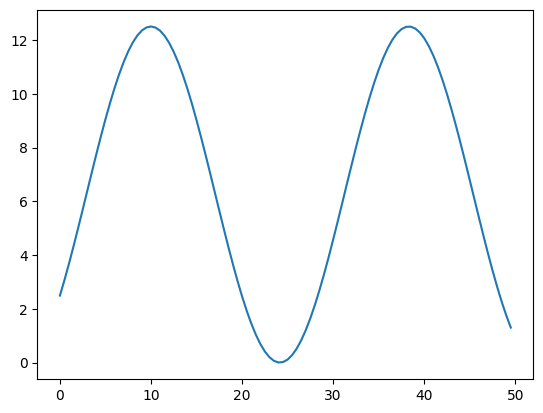

In [10]:
plt.plot(x_list[:se_length]*0.0529177, Psi_left_sq)
# plt.xlim(476, 480)

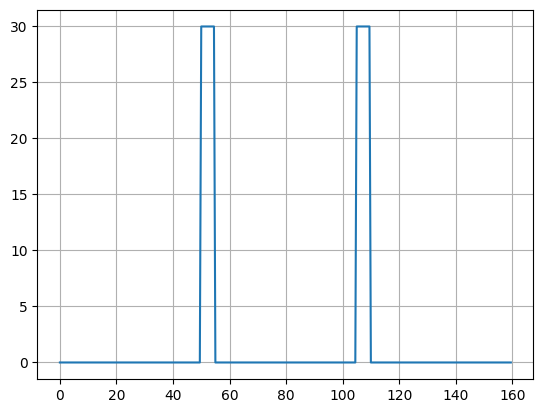

In [11]:
plt.plot(x_list*0.0529177, V*27211.6)
# plt.ylim(-0.0001)
plt.grid()

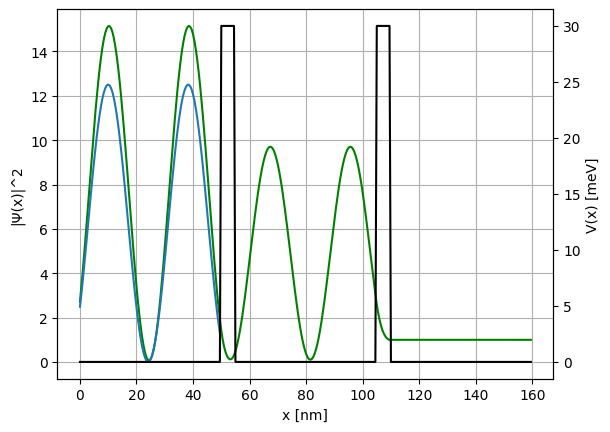

In [12]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
d1 = ax2.plot(x_list*0.0529177, V*27211.6, 'black')
d2 = ax1.plot(x_list*0.0529177, Psi_sq, 'green')
d3 = ax1.plot(x_list[:se_length]*0.0529177, Psi_left_sq)
ax1.grid()
ax1.set_xlabel('x [nm]')
ax1.set_ylabel('|Ψ(x)|^2')
ax2.set_ylabel('V(x) [meV]')
d = d1+d2+d3

plt.tight_layout
plt.show()


zad 2

In [13]:
E_new = np.linspace(0, 50, 10000)/27211.6  
E_new = np.delete(E_new, 0, 0)
q_new = np.zeros(len(E_new))
len(E_new)

9999

In [14]:
for i in range(0, len(E_new)-1):
    q_new[i] = np.sqrt(2*m*E_new[i])


In [15]:
Psi_new = np.zeros([len(E_new), 3*length + 2*width], dtype='complex')
Psi_new_sq = np.zeros([len(E_new), 3*length + 2*width])

A_new = np.zeros(len(E_new), dtype='complex')
B_new = np.zeros(len(E_new), dtype='complex')



T_new = np.zeros(len(E_new))
R_new = np.zeros(len(E_new))

In [16]:
for i in range(len(q_new)):
    Psi_new[i,-2] =  np.sqrt(2*m*E_new[i])

In [21]:
for j in range(0, len(E_new)-1):
    for i in range(len(Psi_new[0])-3, -1, -1):
        Psi_new[j, i] = -2*m * (E_new[j]-V[i+1]) * dx**2 * Psi_new[j, i+1] - Psi_new[j, i+2] + 2*Psi_new[j, i+1]

In [22]:
for i in range(0, len(E_new)):
    Psi_new_sq[i] = np.abs(Psi_new[i])**2

In [45]:
for i in range(0, len(q_new)):    
    A_new[i] = ( Psi_new[i, x1]*np.exp(1j*x1*dx*q_new[i]) - Psi_new[i, x2]*np.exp(1j*x2*dx*q_new[i]) ) / ( (np.exp(1j*x1*dx*q_new[i]))**2 - (np.exp(1j*x2*dx*q_new[i]))**2)

    B_new[i] = -((( -Psi_new[i, x2] * np.exp(1j*q_new[i]*x1*dx) + Psi_new[i, x1] * np.exp(1j*q_new[i]*x2*dx) )) * 
        ( np.exp(1j*q_new[i]*x1*dx + 1j*q_new[i]*x2*dx) ))/( (np.exp(1j*q_new[i]*x1*dx))**2 - (np.exp(1j*q_new[i]*x2*dx))**2 )

for i in range(0, len(E_new)):
    R_new[i] = (np.abs(B_new[i]))**2 / (np.abs(A_new[i]))**2
    T_new[i] = 1 / ((np.abs(A_new[i]))**2)


/tmp/ipykernel_162913/3129189766.py:2: RuntimeWarning: invalid value encountered in cdouble_scalars
  A_new[i] = ( Psi_new[i, x1]*np.exp(1j*x1*dx*q_new[i]) - Psi_new[i, x2]*np.exp(1j*x2*dx*q_new[i]) ) / ( (np.exp(1j*x1*dx*q_new[i]))**2 - (np.exp(1j*x2*dx*q_new[i]))**2)
/tmp/ipykernel_162913/3129189766.py:4: RuntimeWarning: invalid value encountered in cdouble_scalars
  B_new[i] = -((( -Psi_new[i, x2] * np.exp(1j*q_new[i]*x1*dx) + Psi_new[i, x1] * np.exp(1j*q_new[i]*x2*dx) )) *


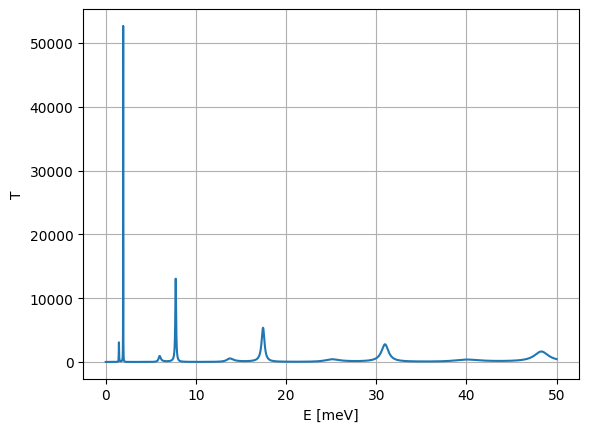

In [46]:
plt.plot(E_new*27211.6, T_new)
plt.grid()
plt.xlabel('E [meV]')
plt.ylabel('T')
plt.show()

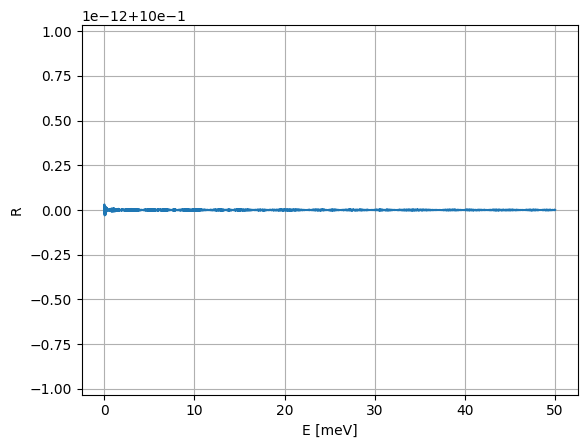

In [47]:
plt.plot(E_new*27211.6, R_new)
plt.grid()
plt.xlabel('E [meV]')
plt.ylabel('R')
plt.show()